In [1]:
import numpy as np
import pandas as pd
import sys
from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append("/Users/clemens/Documents/Code/AnalysisToolbox")

import spikeAnalysisToolsV2.data_loading as data
import spikeAnalysisToolsV2.firing_rates as firing
import spikeAnalysisToolsV2.helper as helper
import spikeAnalysisToolsV2.overviews as overview
import spikeAnalysisToolsV2.combine_stimuli as combine
import spikeAnalysisToolsV2.plotting as spikeplot
import spikeAnalysisToolsV2.information_scores as info

In [2]:
masterpath = "/Users/clemens/Documents/Code/ModelClemens/output"
## set the subfolder to the Simulation you want to analyse 

subfolders = [
#    "12_27-15_51_long_test_good_ct_trace"
#     "12_27-17_24_test_testing_stim"
    "01_10-17_28_rounded_long_test_no_CT"
            ]


extensions =  ["initial"] + ["trained_e285"] #+ ["trained_e285"]#, 
    

# info_neurons is just an array of the information from above. This makes it easier to run the functions and pass the information. 
# info_times same for times
network_architecture = dict(
    num_exc_neurons_per_layer = 64*64,
    num_inh_neurons_per_layer = 32*32,
    num_layers = 4,
    #total_per_layer = num_exc_neurons_per_layer + num_inh_neurons_per_layer,
    #total_network = total_per_layer * num_layers,
    #num_stimuli = 16
)


stimuli_names = data.load_testing_stimuli_names(masterpath+"/" + subfolders[0])
# print(stimuli_names)
stimuli_ids = data.load_testing_stimuli_ids(masterpath+"/" + subfolders[0])
print(stimuli_ids)

info_times = dict(
    length_of_stimulus = 2.0,
    num_stimuli = len(stimuli_names),
    time_start = 1.5,
    time_end = 1.9
)

n_neurons_to_plot = 500


{'1wcl': [0, 16, 32, 48, 64, 80, 96, 112, 128, 144, 160], '1bcl': [1, 17, 33, 49, 65, 81, 97, 113, 129, 145, 161], '1wdl': [2, 18, 34, 50, 66, 82, 98, 114, 130, 146, 162], '1bdl': [3, 19, 35, 51, 67, 83, 99, 115, 131, 147, 163], '2wcl': [4, 20, 36, 52, 68, 84, 100, 116, 132, 148, 164], '2bcl': [5, 21, 37, 53, 69, 85, 101, 117, 133, 149, 165], '2wdl': [6, 22, 38, 54, 70, 86, 102, 118, 134, 150, 166], '2bdl': [7, 23, 39, 55, 71, 87, 103, 119, 135, 151, 167], '1wcr': [8, 24, 40, 56, 72, 88, 104, 120, 136, 152, 168], '1bcr': [9, 25, 41, 57, 73, 89, 105, 121, 137, 153, 169], '1wdr': [10, 26, 42, 58, 74, 90, 106, 122, 138, 154, 170], '1bdr': [11, 27, 43, 59, 75, 91, 107, 123, 139, 155, 171], '2wcr': [12, 28, 44, 60, 76, 92, 108, 124, 140, 156, 172], '2bcr': [13, 29, 45, 61, 77, 93, 109, 125, 141, 157, 173], '2wdr': [14, 30, 46, 62, 78, 94, 110, 126, 142, 158, 174], '2bdr': [15, 31, 47, 63, 79, 95, 111, 127, 143, 159, 175]}


In [3]:
spikes = data.load_spikes_from_subfolders(masterpath, subfolders, extensions, False)

rates_subfolders = firing.calculate_rates_subfolder(
    spikes,
    network_architecture, 
    info_times)
spikes = None

Start


# V4 like shape cells
I.e. Cells that respond to objects differently depending on wether they are left of loc1/loc2 or right of it. 
**Independent** of color (black or white), shape (circle or diamond), or location (loc1 or loc2)

In [4]:
object_list_shape = data.load_testing_stimuli_indices_from_wildcarts(masterpath+"/" + subfolders[0], ["***r", "***l"])
object_indices_shape = [o['indices'] for o in object_list_shape]
print(object_indices_shape)

[[8, 9, 10, 11, 12, 13, 14, 15, 24, 25, 26, 27, 28, 29, 30, 31, 40, 41, 42, 43, 44, 45, 46, 47, 56, 57, 58, 59, 60, 61, 62, 63, 72, 73, 74, 75, 76, 77, 78, 79, 88, 89, 90, 91, 92, 93, 94, 95, 104, 105, 106, 107, 108, 109, 110, 111, 120, 121, 122, 123, 124, 125, 126, 127, 136, 137, 138, 139, 140, 141, 142, 143, 152, 153, 154, 155, 156, 157, 158, 159, 168, 169, 170, 171, 172, 173, 174, 175], [0, 1, 2, 3, 4, 5, 6, 7, 16, 17, 18, 19, 20, 21, 22, 23, 32, 33, 34, 35, 36, 37, 38, 39, 48, 49, 50, 51, 52, 53, 54, 55, 64, 65, 66, 67, 68, 69, 70, 71, 80, 81, 82, 83, 84, 85, 86, 87, 96, 97, 98, 99, 100, 101, 102, 103, 112, 113, 114, 115, 116, 117, 118, 119, 128, 129, 130, 131, 132, 133, 134, 135, 144, 145, 146, 147, 148, 149, 150, 151, 160, 161, 162, 163, 164, 165, 166, 167]]


/Users/clemens/Documents/Code/AnalysisToolbox/spikeAnalysisToolsV2/information_scores.py:205: RuntimeWarning: invalid value encountered in true_divide
  exc_info = single_cell_information(exc_table)
/Users/clemens/Documents/Code/AnalysisToolbox/spikeAnalysisToolsV2/information_scores.py:205: RuntimeWarning: divide by zero encountered in log2
  exc_info = single_cell_information(exc_table)
/Users/clemens/Documents/Code/AnalysisToolbox/spikeAnalysisToolsV2/information_scores.py:209: RuntimeWarning: invalid value encountered in true_divide
  inh_info = single_cell_information(inh_table)
/Users/clemens/Documents/Code/AnalysisToolbox/spikeAnalysisToolsV2/information_scores.py:209: RuntimeWarning: divide by zero encountered in log2
  inh_info = single_cell_information(inh_table)


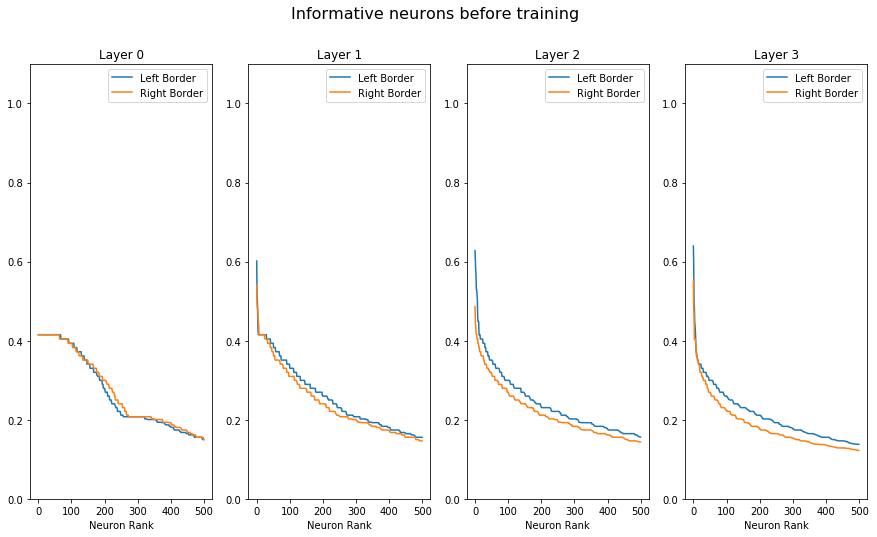

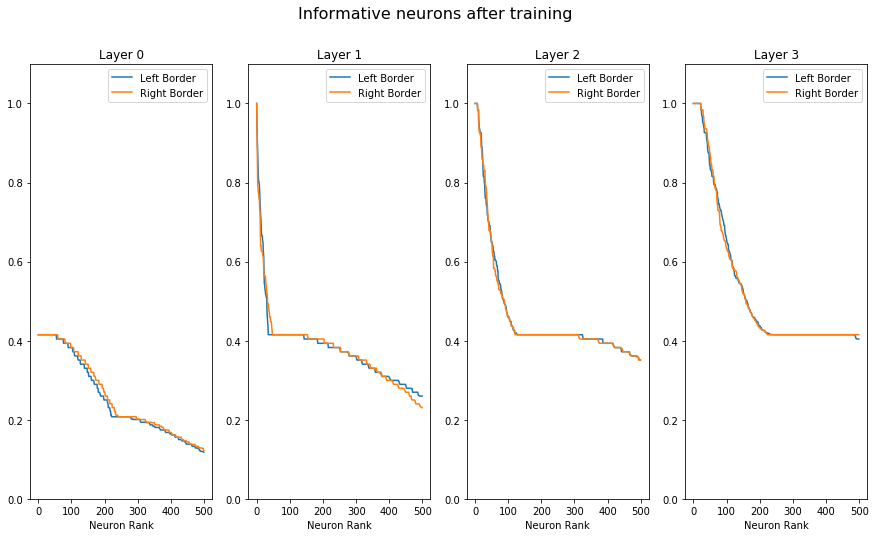

In [5]:
exh_shape_info_before, inh_shape_info_before = info.firing_rates_to_single_cell_information(rates_subfolders[0][0], object_indices_shape, n_bins=3, calc_inhibitory=True)
spikeplot.plot_ranked_neurons(exh_shape_info_before, "Informative neurons before training", n_neurons_to_plot, ["Left Border", "Right Border"], vmax=1)

exh_shape_info_after, inh_shape_info_after = info.firing_rates_to_single_cell_information(rates_subfolders[0][1], object_indices_shape, n_bins=3, calc_inhibitory=True)
spikeplot.plot_ranked_neurons(exh_shape_info_after, "Informative neurons after training", n_neurons_to_plot, ["Left Border", "Right Border"], vmax=1)

#### Single Neurons

In [6]:
# get the multistimulus stuff going
multi_stim_foldername = "multiStim_trained_e285"
multi_stimpath = masterpath + "/" + subfolders[0] + "/" + multi_stim_foldername + "/"

multiStimuli_names = data.load_testing_stimuli_names(multi_stimpath)
# print(stimuli_names)
multiStimuli_ids = data.load_testing_stimuli_ids(multi_stimpath)

info_times_multiStim = dict(**info_times)
info_times_multiStim['num_stimuli'] = len(multiStimuli_names)

In [7]:

multistim_spikes = data.pandas_load_spikes(multi_stimpath)

multiStim_fr = firing.stimuli_and_layerwise_firing_rates(multistim_spikes, network_architecture, info_times_multiStim)

multiStim_fr_np, _inh = helper.nested_list_of_stimuli_2_np(multiStim_fr)
print(multiStim_fr_np.shape)

(160, 4, 4096)


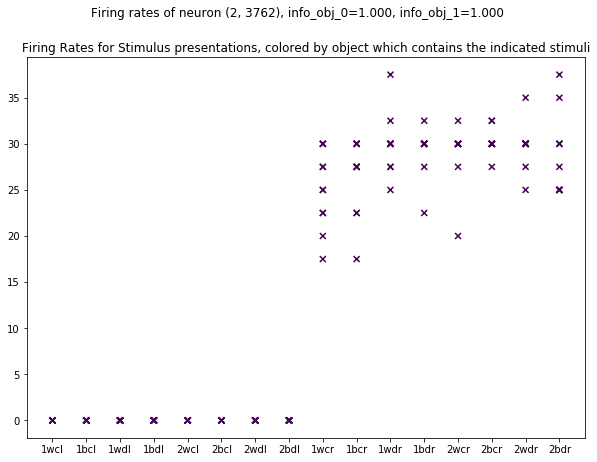

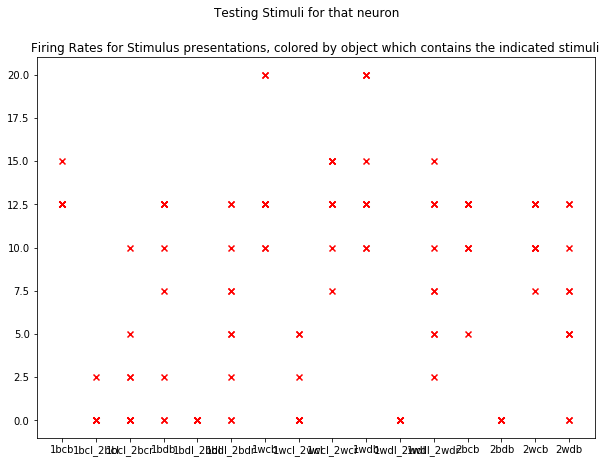

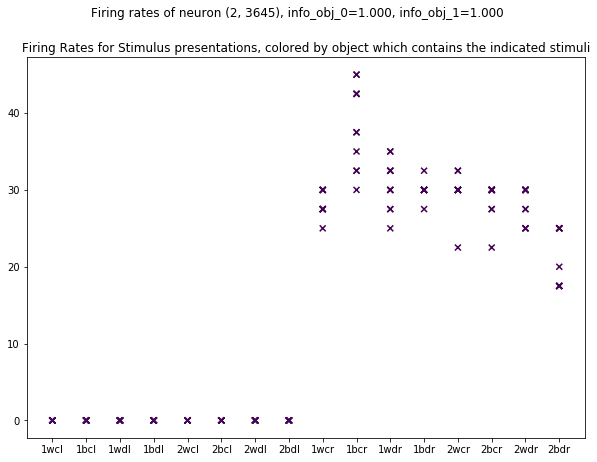

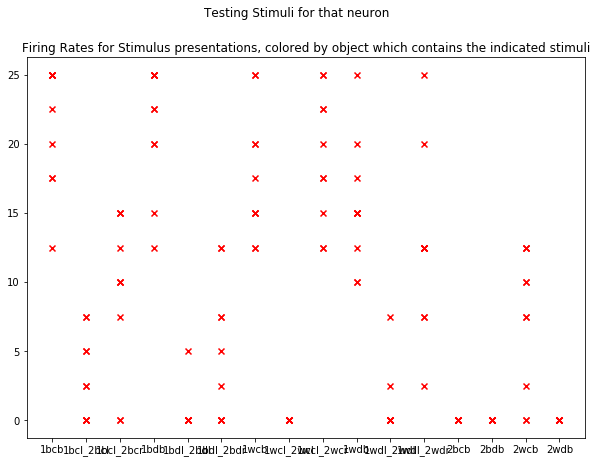

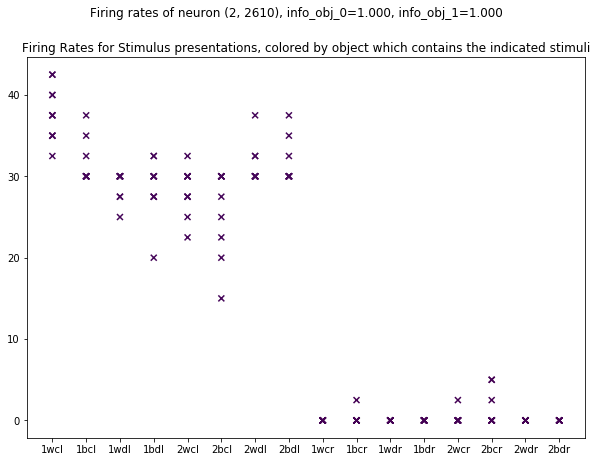

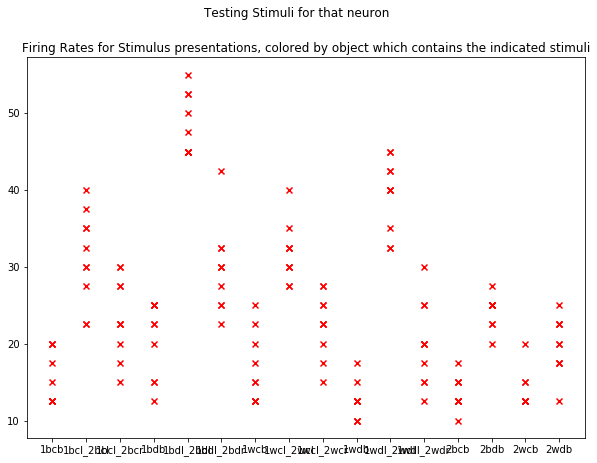

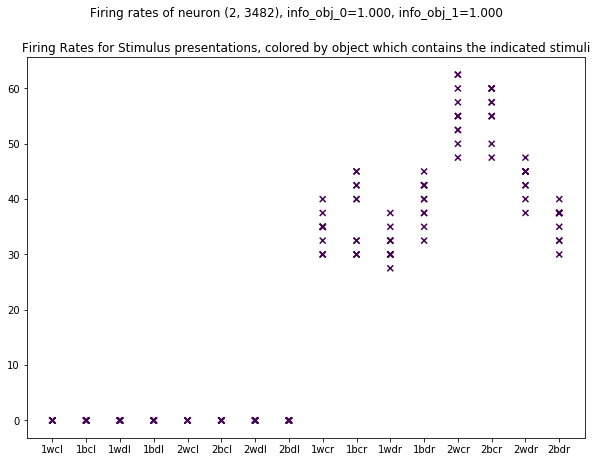

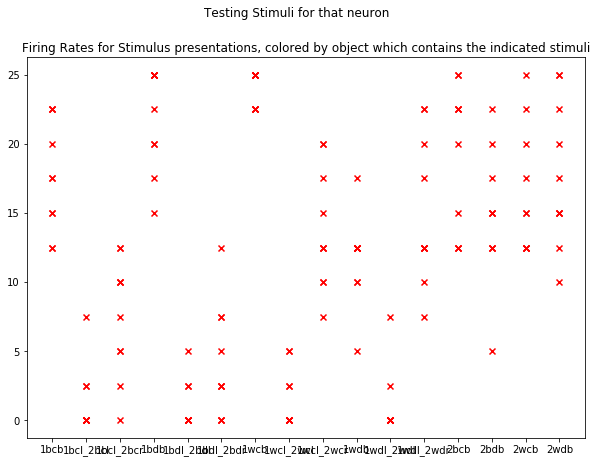

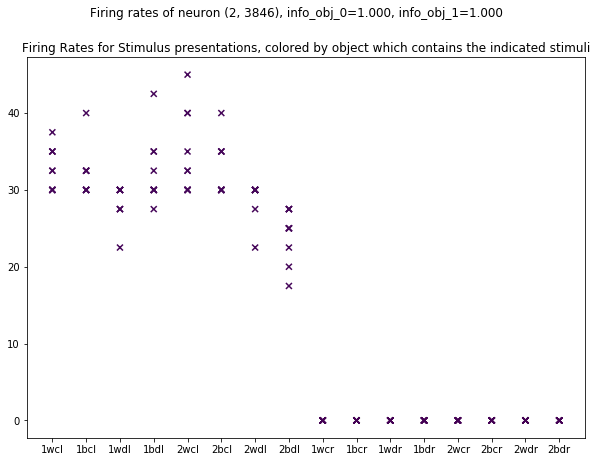

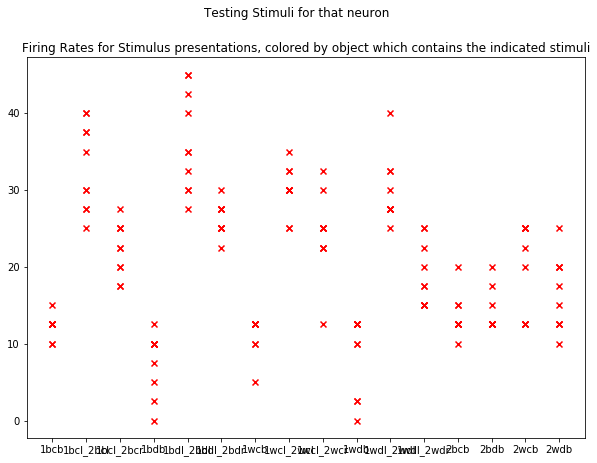

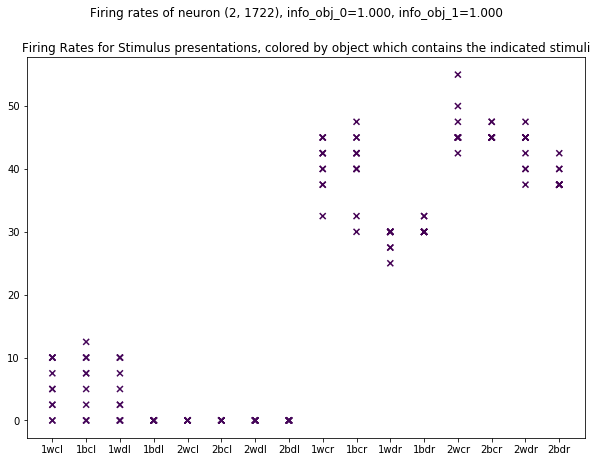

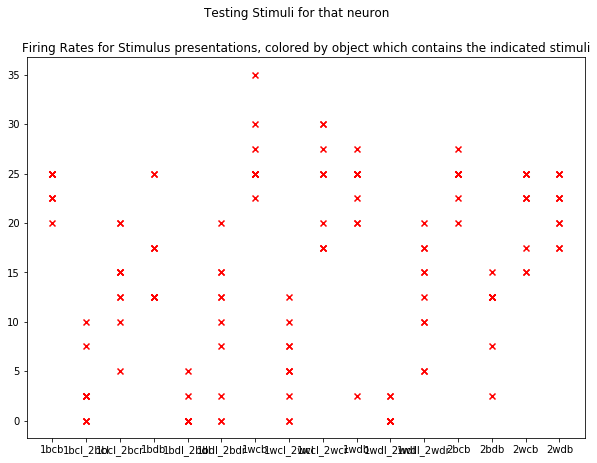

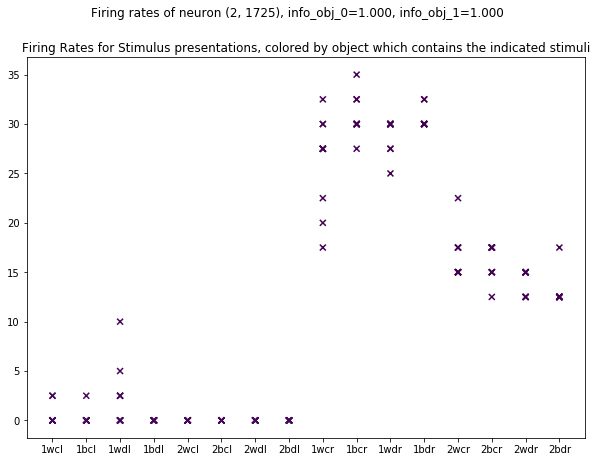

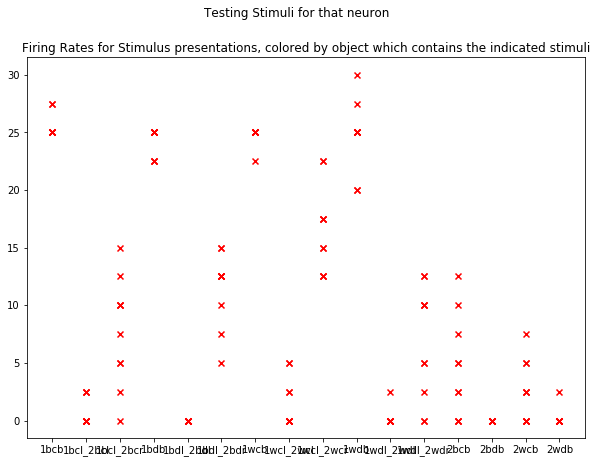

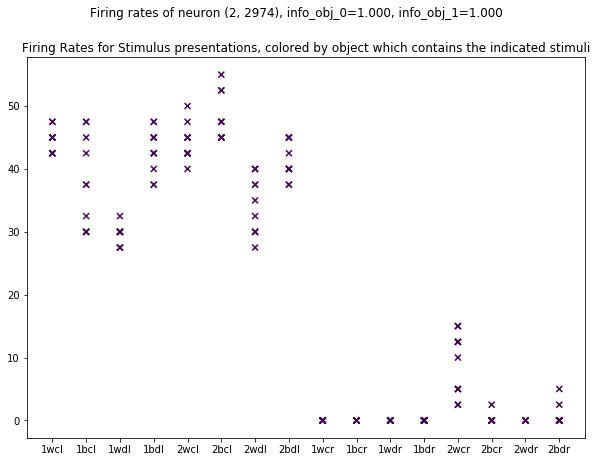

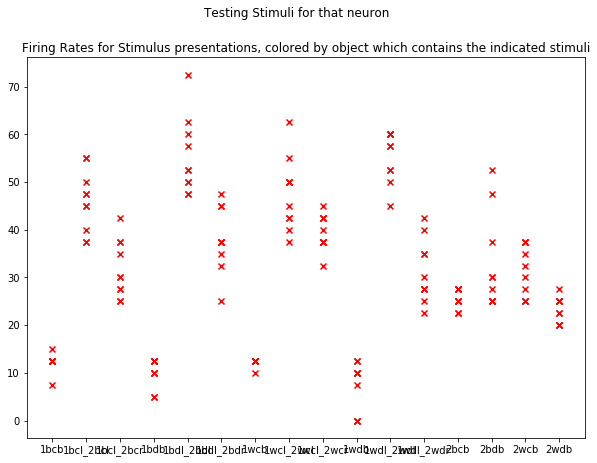

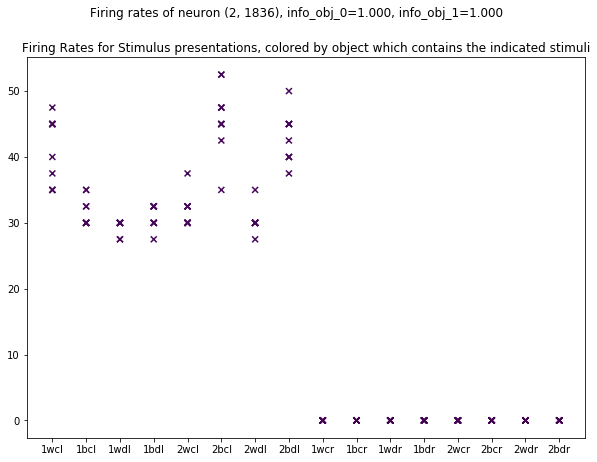

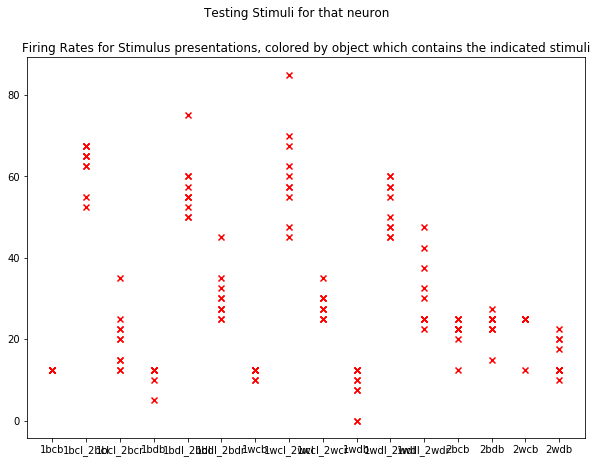

In [8]:
layer, object_id = 3, 1
rates_exc_before, rates_inh_before = helper.nested_list_of_stimuli_2_np(rates_subfolders[0][0])
rates_exc_after, rates_inh_after = helper.nested_list_of_stimuli_2_np(rates_subfolders[0][1])

list_of_interesting_neurons = np.argsort(exh_shape_info_after[object_id, layer, :])[:-10:-1]

for interesting_neuron_id in list_of_interesting_neurons:
    title = "Firing rates of neuron (2, {}), info_obj_0={:.3f}, info_obj_1={:.3f}".format(interesting_neuron_id, exh_shape_info_after[0,layer,interesting_neuron_id], exh_shape_info_after[1,layer,interesting_neuron_id])
    response_of_that = rates_exc_after[:, layer, interesting_neuron_id]    
    spikeplot.plot_firing_rates_by_stim(response_of_that, stimuli_ids, title, color_indices=object_indices_shape)
    
    multiStim_response_of_that = multiStim_fr_np[:, layer, interesting_neuron_id]
    spikeplot.plot_firing_rates_by_stim(multiStim_response_of_that, multiStimuli_ids, "Testing Stimuli for that neuron")


# Border ownership cells
I.e. one neuron would have a score of 2.0 if it is only responsive for a right border at loc1. **Independent** of the color (black or white) and shape (circle or diamond) of the object.

In [9]:
object_list_bo = data.load_testing_stimuli_indices_from_wildcarts(masterpath+"/" + subfolders[0], ["1**r", "1**l", "2**l", "2**r"])
object_indices_bo = [o['indices'] for o in object_list_bo]
print(object_indices_bo)

[[8, 9, 10, 11, 24, 25, 26, 27, 40, 41, 42, 43, 56, 57, 58, 59, 72, 73, 74, 75, 88, 89, 90, 91, 104, 105, 106, 107, 120, 121, 122, 123, 136, 137, 138, 139, 152, 153, 154, 155, 168, 169, 170, 171], [0, 1, 2, 3, 16, 17, 18, 19, 32, 33, 34, 35, 48, 49, 50, 51, 64, 65, 66, 67, 80, 81, 82, 83, 96, 97, 98, 99, 112, 113, 114, 115, 128, 129, 130, 131, 144, 145, 146, 147, 160, 161, 162, 163], [4, 5, 6, 7, 20, 21, 22, 23, 36, 37, 38, 39, 52, 53, 54, 55, 68, 69, 70, 71, 84, 85, 86, 87, 100, 101, 102, 103, 116, 117, 118, 119, 132, 133, 134, 135, 148, 149, 150, 151, 164, 165, 166, 167], [12, 13, 14, 15, 28, 29, 30, 31, 44, 45, 46, 47, 60, 61, 62, 63, 76, 77, 78, 79, 92, 93, 94, 95, 108, 109, 110, 111, 124, 125, 126, 127, 140, 141, 142, 143, 156, 157, 158, 159, 172, 173, 174, 175]]


/Users/clemens/Documents/Code/AnalysisToolbox/spikeAnalysisToolsV2/information_scores.py:205: RuntimeWarning: invalid value encountered in true_divide
  exc_info = single_cell_information(exc_table)
/Users/clemens/Documents/Code/AnalysisToolbox/spikeAnalysisToolsV2/information_scores.py:205: RuntimeWarning: divide by zero encountered in log2
  exc_info = single_cell_information(exc_table)
/Users/clemens/Documents/Code/AnalysisToolbox/spikeAnalysisToolsV2/information_scores.py:209: RuntimeWarning: invalid value encountered in true_divide
  inh_info = single_cell_information(inh_table)
/Users/clemens/Documents/Code/AnalysisToolbox/spikeAnalysisToolsV2/information_scores.py:209: RuntimeWarning: divide by zero encountered in log2
  inh_info = single_cell_information(inh_table)


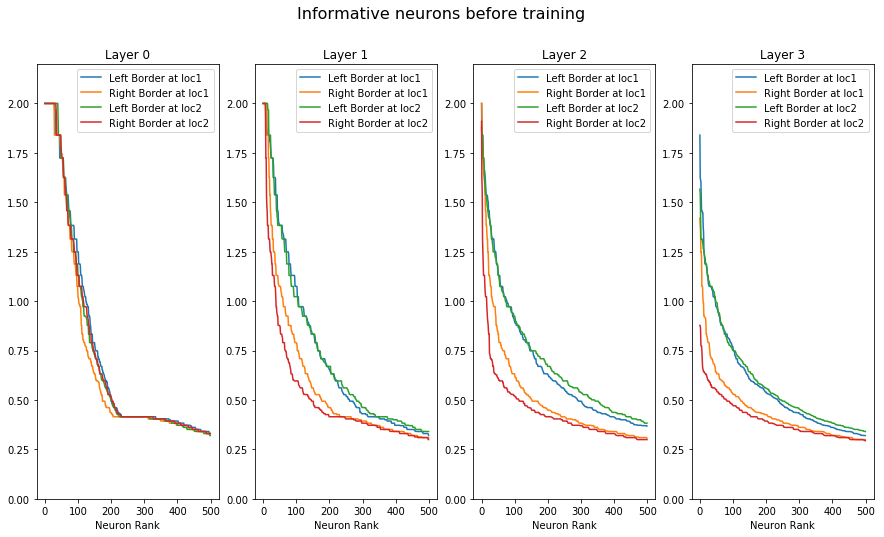

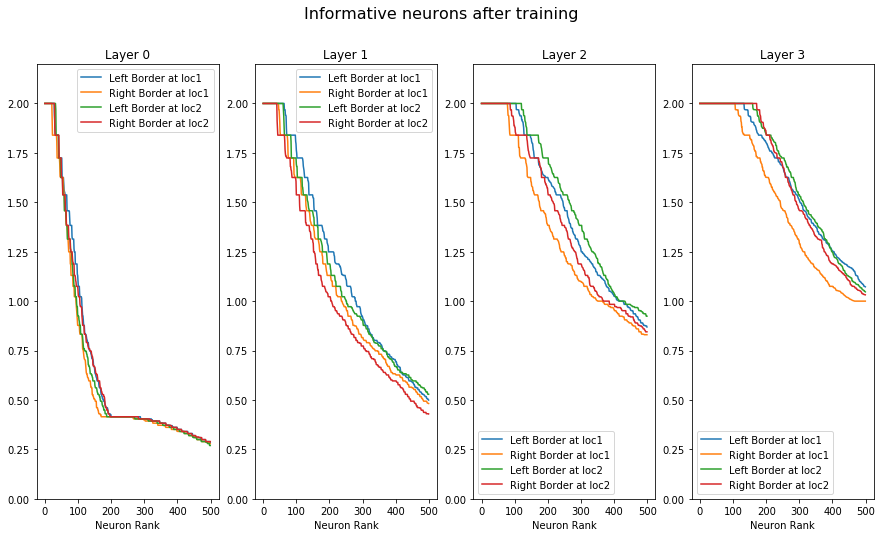

In [10]:
exh_info_before, inh_info_before = info.firing_rates_to_single_cell_information(rates_subfolders[0][0], object_indices_bo, n_bins=3, calc_inhibitory=True)
spikeplot.plot_ranked_neurons(exh_info_before, "Informative neurons before training", n_neurons_to_plot, item_label=["Left Border at loc1", "Right Border at loc1", "Left Border at loc2", "Right Border at loc2"], vmax=2)

exh_info_after, inh_info_after = info.firing_rates_to_single_cell_information(rates_subfolders[0][1], object_indices_bo, n_bins=3, calc_inhibitory=True)
spikeplot.plot_ranked_neurons(exh_info_after, "Informative neurons after training", n_neurons_to_plot, ["Left Border at loc1", "Right Border at loc1", "Left Border at loc2", "Right Border at loc2"], vmax=2)